# Convergence Tests With Modes and Period

In [1]:
import sys
sys.path.append(r"C:\Users\user\Desktop\PhD\Bruno Paper\Code\Approach A")
import numpy as np
import random as rand
from Trajectory import Trajectory
from System import System
from traj2vec import traj2vec, vec2traj
import trajectory_functions as traj_funcs
import residual_functions as res_funcs
from my_fft import my_fft, my_ifft
import matplotlib.pyplot as plt
from min_wrapper import my_min
from test_cases import lorenz
from test_cases import unit_circle_3d as uc3
import h5py

# %matplotlib qt

In [2]:
sys = System(lorenz)

mean = np.zeros(3)
mean[2] = 23.042103969255397
# mean[2] = 23

## Change period (fix number of modes)

### T = 1.5

In [18]:
stdev = 1
mu = 0
T1 = 1.5
op_traj_T1 = Trajectory(np.zeros([3, int(100)], dtype = complex))
for i in range(1, op_traj_T1.shape[1]):
    for j in range(3):
        op_traj_T1[j, i] = 0.1*(rand.gauss(mu, stdev) + 1j*rand.gauss(mu, stdev))
op_freq_T1 = (2*np.pi)/T1
traces_T1 = None

In [19]:
maxiter_T1 = 1000

op_traj_T1, op_freq_T1, traces_T1, sol_T1 = my_min(op_traj_T1, sys, op_freq_T1, mean, iter = maxiter_T1, traces = traces_T1)

print()
print(sol_T1.message)
print("Period of orbit: " + str((2*np.pi)/op_freq_T1))
print("Global Residual: " + str(res_funcs.global_residual(op_traj_T1, sys, op_freq_T1, mean)))


b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
Period of orbit: 1.5
Global Residual: 4.014925630032592


### T = 3

In [20]:
stdev = 1
mu = 0
T2 = 3
op_traj_T2 = Trajectory(np.zeros([3, int(100)], dtype = complex))
for i in range(1, op_traj_T2.shape[1]):
    for j in range(3):
        op_traj_T2[j, i] = 0.1*(rand.gauss(mu, stdev) + 1j*rand.gauss(mu, stdev))
op_freq_T2 = (2*np.pi)/T2
traces_T2 = None

In [21]:
maxiter_T2 = 1000

op_traj_T2, op_freq_T2, traces_T2, sol_T2 = my_min(op_traj_T2, sys, op_freq_T2, mean, iter = maxiter_T2, traces = traces_T2)

print()
print(sol_T2.message)
print("Period of orbit: " + str((2*np.pi)/op_freq_T2))
print("Global Residual: " + str(res_funcs.global_residual(op_traj_T2, sys, op_freq_T2, mean)))


b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
Period of orbit: 3.0
Global Residual: 4.376705923922703


### T = 10

In [22]:
stdev = 1
mu = 0
T3 = 10
op_traj_T3 = Trajectory(np.zeros([3, int(100)], dtype = complex))
for i in range(1, op_traj_T3.shape[1]):
    for j in range(3):
        op_traj_T3[j, i] = 0.1*(rand.gauss(mu, stdev) + 1j*rand.gauss(mu, stdev))
op_freq_T3 = (2*np.pi)/T3
traces_T3 = None

In [23]:
maxiter_T3 = 1000

op_traj_T3, op_freq_T3, traces_T3, sol_T3 = my_min(op_traj_T3, sys, op_freq_T3, mean, iter = maxiter_T3, traces = traces_T3)

print()
print(sol_T3.message)
print("Period of orbit: " + str((2*np.pi)/op_freq_T3))
print("Global Residual: " + str(res_funcs.global_residual(op_traj_T3, sys, op_freq_T3, mean)))


b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
Period of orbit: 10.0
Global Residual: 9.591302024714746


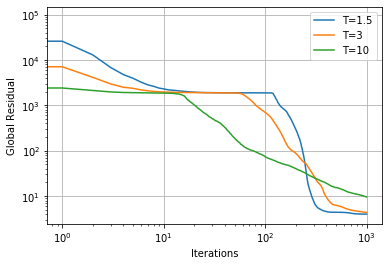

In [25]:
plt.figure(1)
plt.loglog(traces_T1['gr'], label = "T=1.5")
plt.plot(traces_T2['gr'], label = "T=3")
plt.plot(traces_T3['gr'], label = "T=10")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Global Residual")
plt.grid()
plt.show()

## Change number of modes (fix period)

In [95]:
T = 10
maxiter = 10000

### M = T*5

In [96]:
stdev = 1
mu = 0
op_traj_M1 = Trajectory(np.zeros([3, int(T*5)], dtype = complex))
for i in range(1, op_traj_M1.shape[1]):
    for j in range(3):
        op_traj_M1[j, i] = 0.1*(rand.gauss(mu, stdev) + 1j*rand.gauss(mu, stdev))
op_freq_M1 = (2*np.pi)/T
traces_M1 = None

In [97]:
op_traj_M1, op_freq_M1, traces_M1, sol_M1 = my_min(op_traj_M1, sys, op_freq_M1, mean, iter = maxiter, traces = traces_M1)

print()
print(sol_M1.message)
print("Period of orbit: " + str((2*np.pi)/op_freq_M1))
print("Global Residual: " + str(res_funcs.global_residual(op_traj_M1, sys, op_freq_M1, mean)))


b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
Period of orbit: 10.0
Global Residual: 10.992835550315974


### M = T*10

In [98]:
stdev = 1
mu = 0
op_traj_M2 = Trajectory(np.zeros([3, int(T*10)], dtype = complex))
for i in range(1, op_traj_M2.shape[1]):
    for j in range(3):
        op_traj_M2[j, i] = 0.1*(rand.gauss(mu, stdev) + 1j*rand.gauss(mu, stdev))
op_freq_M2 = (2*np.pi)/T
traces_M2 = None

In [99]:
op_traj_M2, op_freq_M2, traces_M2, sol_M2 = my_min(op_traj_M2, sys, op_freq_M2, mean, iter = maxiter, traces = traces_M2)

print()
print(sol_M2.message)
print("Period of orbit: " + str((2*np.pi)/op_freq_M2))
print("Global Residual: " + str(res_funcs.global_residual(op_traj_M2, sys, op_freq_M2, mean)))


b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
Period of orbit: 10.0
Global Residual: 10.949998811638181


### M = T*15

In [100]:
stdev = 1
mu = 0
op_traj_M3 = Trajectory(np.zeros([3, int(T*15)], dtype = complex))
for i in range(1, op_traj_M3.shape[1]):
    for j in range(3):
        op_traj_M3[j, i] = 0.1*(rand.gauss(mu, stdev) + 1j*rand.gauss(mu, stdev))
op_freq_M3 = (2*np.pi)/T
traces_M3 = None

In [101]:
op_traj_M3, op_freq_M3, traces_M3, sol_M3 = my_min(op_traj_M3, sys, op_freq_M3, mean, iter = maxiter, traces = traces_M3)

print()
print(sol_M3.message)
print("Period of orbit: " + str((2*np.pi)/op_freq_M3))
print("Global Residual: " + str(res_funcs.global_residual(op_traj_M3, sys, op_freq_M3, mean)))


b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
Period of orbit: 10.0
Global Residual: 10.160581068605007


### M = T*20

In [102]:
stdev = 1
mu = 0
op_traj_M4 = Trajectory(np.zeros([3, int(T*20)], dtype = complex))
for i in range(1, op_traj_M4.shape[1]):
    for j in range(3):
        op_traj_M4[j, i] = 0.1*(rand.gauss(mu, stdev) + 1j*rand.gauss(mu, stdev))
op_freq_M4 = (2*np.pi)/T
traces_M4 = None

In [103]:
op_traj_M4, op_freq_M4, traces_M4, sol_M4 = my_min(op_traj_M4, sys, op_freq_M4, mean, iter = maxiter, traces = traces_M4)

print()
print(sol_M3.message)
print("Period of orbit: " + str((2*np.pi)/op_freq_M4))
print("Global Residual: " + str(res_funcs.global_residual(op_traj_M4, sys, op_freq_M4, mean)))


b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
Period of orbit: 10.0
Global Residual: 7.8789462160704105


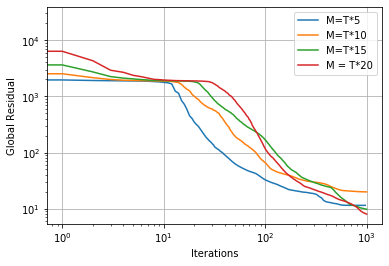

In [93]:
plt.figure(1)
plt.loglog(traces_M1['gr'], label = "M=T*5")
plt.plot(traces_M2['gr'], label = "M=T*10")
plt.plot(traces_M3['gr'], label = "M=T*15")
plt.plot(traces_M4['gr'], label = "M = T*20")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Global Residual")
plt.grid()
plt.show()

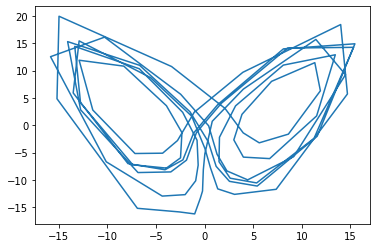

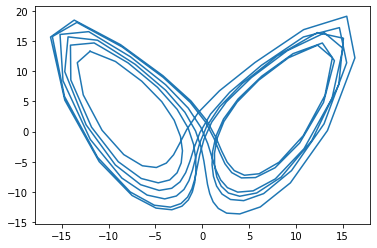

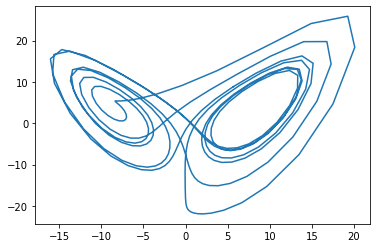

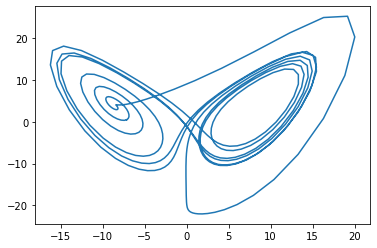

In [104]:
op_traj_M1.plot(proj = 'xz')
op_traj_M2.plot(proj = 'xz')
op_traj_M3.plot(proj = 'xz')
op_traj_M4.plot(proj = 'xz')